In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


file 에서 data를 읽어 오려고 할때는 "numpy"에서 loadtxt라는 함수를 사용하면 된다.

In [2]:
import numpy as np

In [3]:
tf.set_random_seed(777) # for reproducibility

data-01-test-score.csv 파일은 아래와 같이 생겼다.<br>
EXAM1, EXAM2, EXAM3, FINAL<br>
73, 80, 75, 152<br>
93, 88, 93, 185<br>
89, 91, 90, 180<br>
......

In [4]:
xy = np.loadtxt('data-01-test-score.csv', delimiter = ',', dtype = np.float32)
#윗줄의 뜻은 data-01-tex-score.csv라는 파일을 ","를 기준으로 나누고 , 파일의 data 타입은 실수이다.

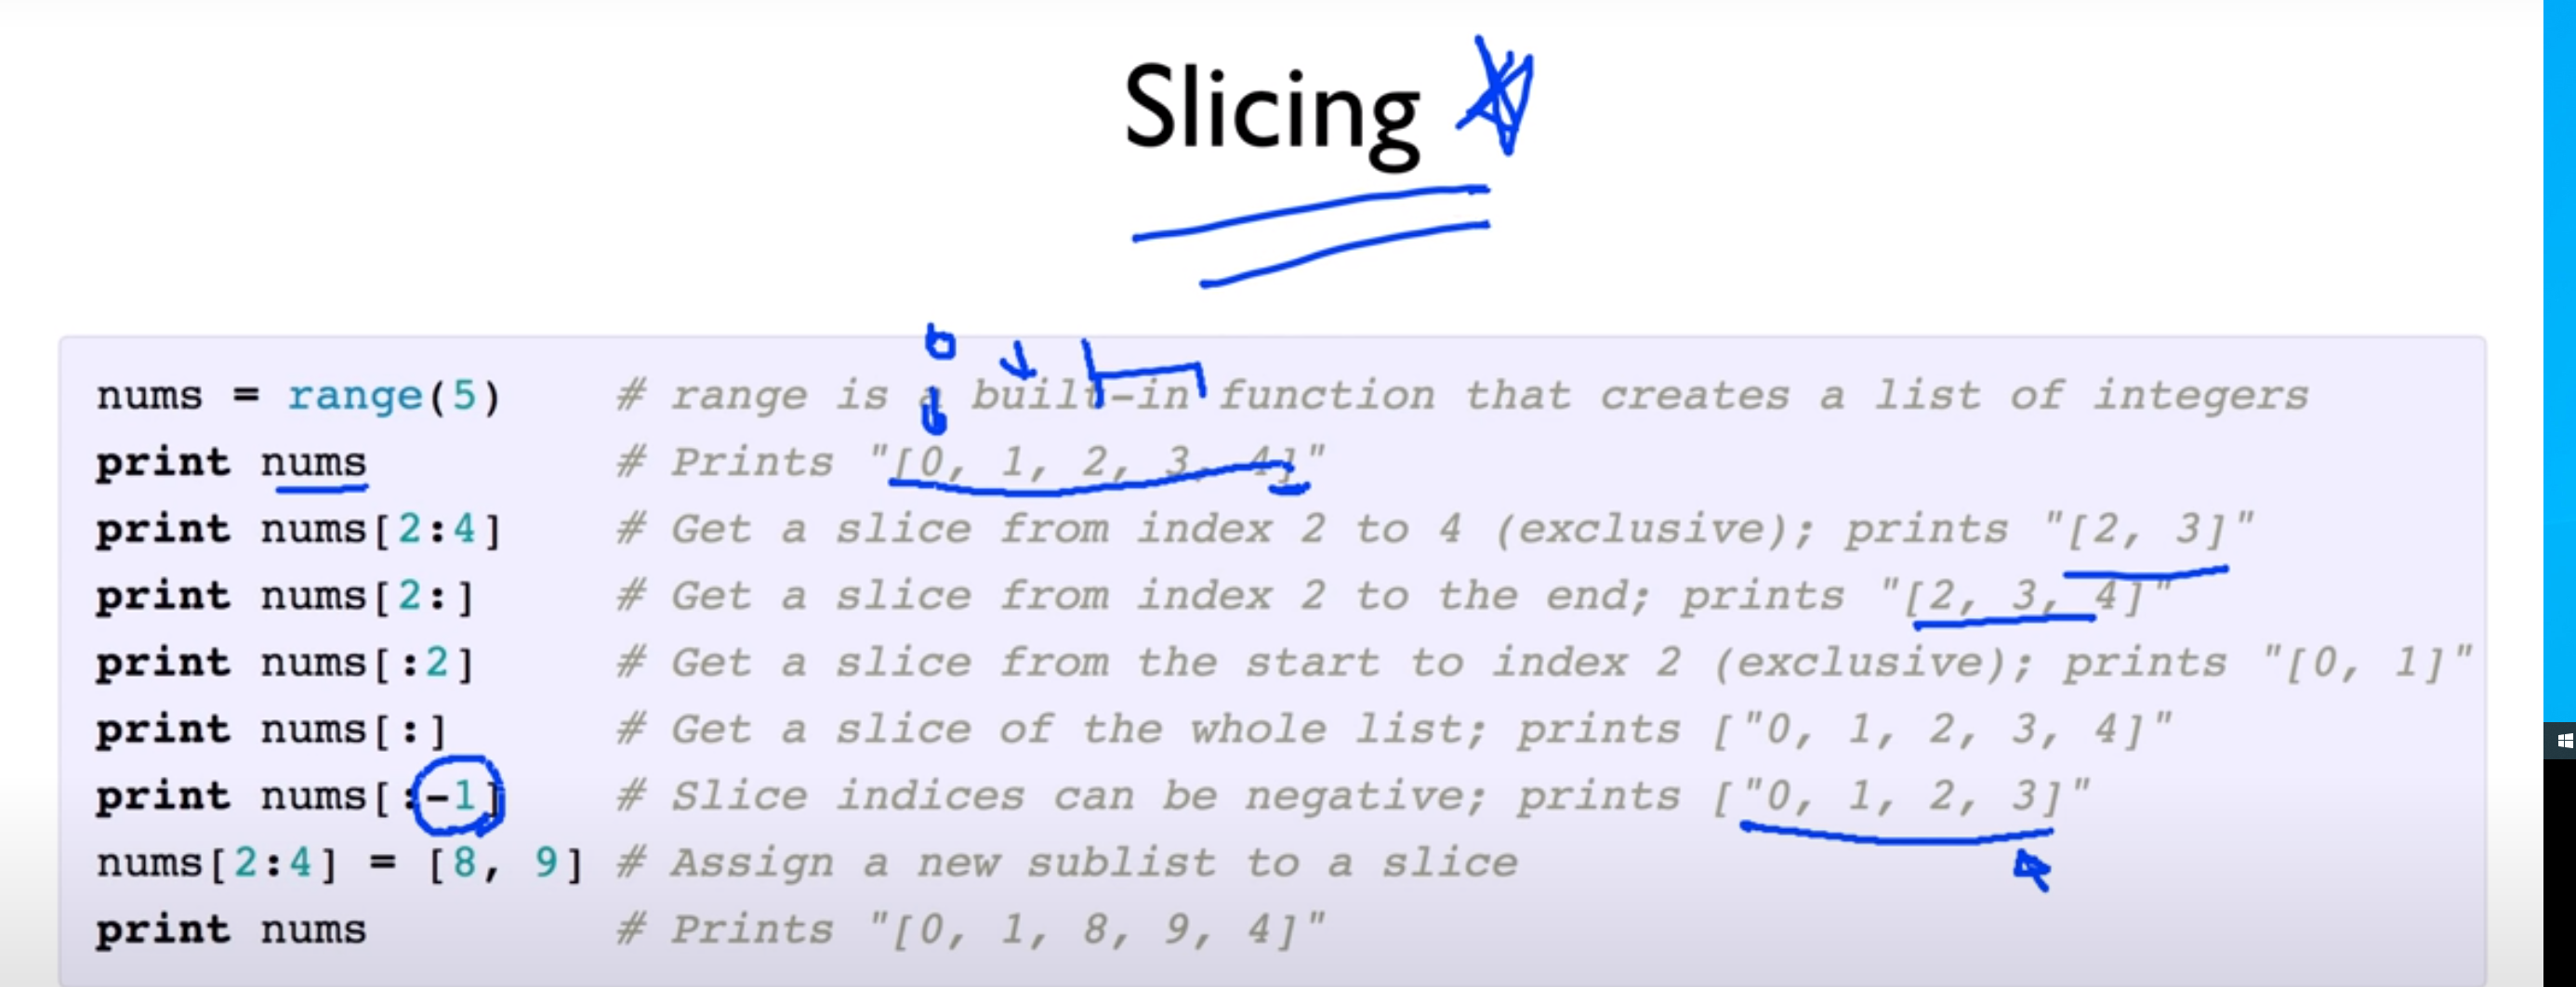

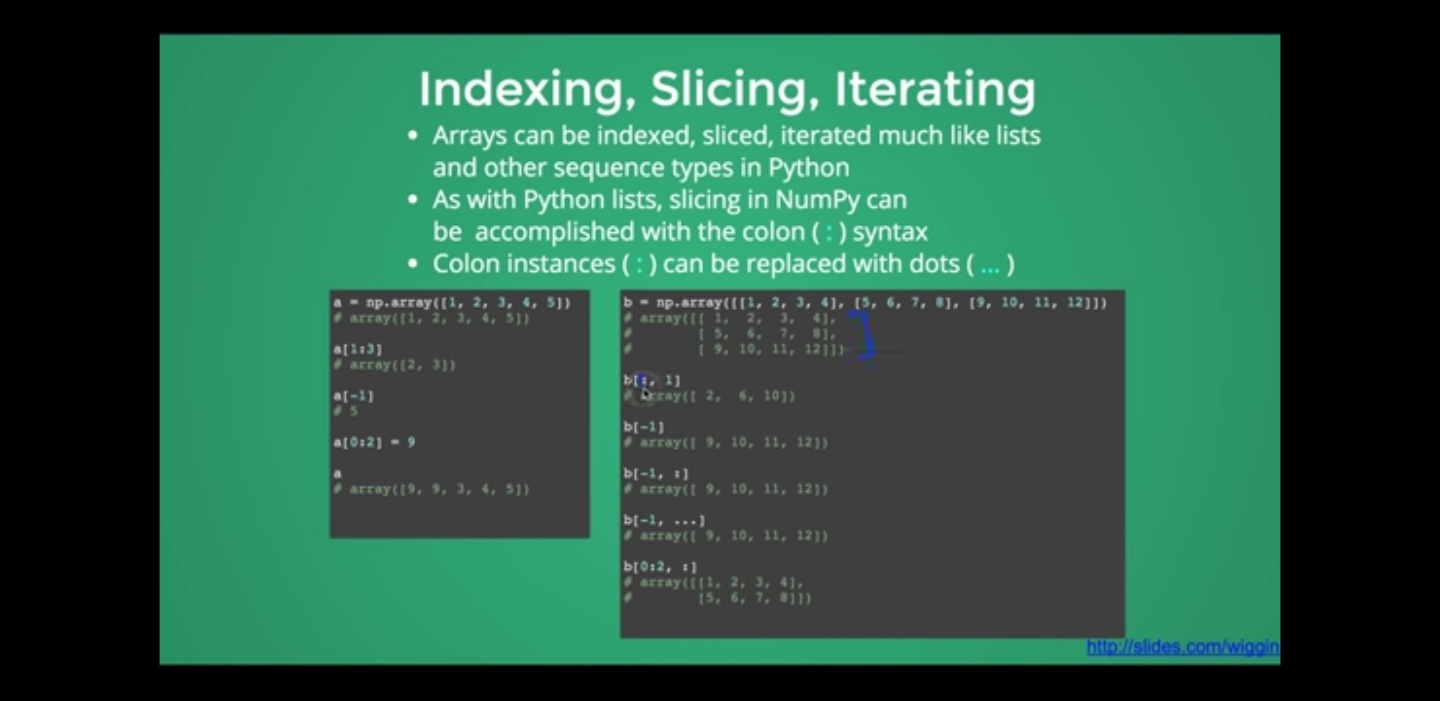

In [5]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [6]:
print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)

(25, 3) [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 25
(25, 1) [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [7]:
#placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

In [8]:
#hypothesis
hypothesis = tf.matmul(X,W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [9]:
#Launch the graph in a session
sess = tf.Session()
#Initializes global variables in the graph
sess.run(tf.global_variables_initializer())
#Set up feed_dict variables inside the loop
for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train],
        feed_dict={X:x_data, Y:y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val,
             "\nPrediction:\n", hy_val)

0 Cost:  2718.816 
Prediction:
 [[105.63413 ]
 [126.47547 ]
 [125.023895]
 [135.61624 ]
 [ 96.54288 ]
 [ 69.79834 ]
 [100.468285]
 [ 73.146675]
 [117.17079 ]
 [106.953476]
 [ 97.20397 ]
 [ 95.26545 ]
 [129.85419 ]
 [108.63137 ]
 [100.75681 ]
 [127.81018 ]
 [103.965   ]
 [120.55726 ]
 [123.95743 ]
 [110.752945]
 [118.138245]
 [117.99579 ]
 [112.82747 ]
 [108.02509 ]
 [131.53586 ]]
10 Cost:  18.7481 
Prediction:
 [[154.14401 ]
 [184.79321 ]
 [182.47781 ]
 [198.19565 ]
 [141.01659 ]
 [102.600494]
 [147.31891 ]
 [107.88934 ]
 [171.68542 ]
 [157.46558 ]
 [142.33817 ]
 [139.77757 ]
 [189.20432 ]
 [157.95853 ]
 [147.82564 ]
 [186.9951  ]
 [150.9374  ]
 [176.7844  ]
 [180.53601 ]
 [161.37724 ]
 [173.07721 ]
 [172.71234 ]
 [165.2041  ]
 [156.9167  ]
 [191.9697  ]]
20 Cost:  18.519215 
Prediction:
 [[154.46925]
 [185.19733]
 [182.86856]
 [198.62894]
 [141.32167]
 [102.83892]
 [147.6511 ]
 [108.14616]
 [172.07562]
 [157.84532]
 [142.65417]
 [140.09796]
 [189.60028]
 [158.2775 ]
 [148.16217]
 [187

370 Cost:  15.491888 
Prediction:
 [[154.15321 ]
 [185.23433 ]
 [182.66951 ]
 [198.66443 ]
 [141.24535 ]
 [103.220665]
 [147.93591 ]
 [108.70605 ]
 [172.51518 ]
 [158.84743 ]
 [142.79372 ]
 [140.51625 ]
 [189.14337 ]
 [157.56456 ]
 [148.5385  ]
 [187.65094 ]
 [150.37976 ]
 [177.58952 ]
 [180.37032 ]
 [161.22968 ]
 [173.76993 ]
 [173.35262 ]
 [165.75395 ]
 [156.32234 ]
 [192.23668 ]]
380 Cost:  15.417536 
Prediction:
 [[154.14494 ]
 [185.23509 ]
 [182.66418 ]
 [198.66531 ]
 [141.24307 ]
 [103.230545]
 [147.94353 ]
 [108.72108 ]
 [172.52655 ]
 [158.8737  ]
 [142.7974  ]
 [140.52716 ]
 [189.1312  ]
 [157.54561 ]
 [148.5485  ]
 [187.65712 ]
 [150.3569  ]
 [177.6004  ]
 [180.35602 ]
 [161.21693 ]
 [173.77802 ]
 [173.35919 ]
 [165.75885 ]
 [156.29845 ]
 [192.23264 ]]
390 Cost:  15.343814 
Prediction:
 [[154.13672]
 [185.23587]
 [182.65889]
 [198.66623]
 [141.24078]
 [103.24039]
 [147.95113]
 [108.73607]
 [172.53787]
 [158.89984]
 [142.80103]
 [140.538  ]
 [189.1191 ]
 [157.52672]
 [148.55844

600 Cost:  13.927052 
Prediction:
 [[153.97343]
 [185.24927]
 [182.5531 ]
 [198.68475]
 [141.19278]
 [103.43586]
 [148.10509]
 [109.03988]
 [172.76247]
 [159.4223 ]
 [142.8745 ]
 [140.75424]
 [188.87639]
 [157.14758]
 [148.75925]
 [187.785  ]
 [149.87563]
 [177.83199]
 [180.0568 ]
 [160.95087]
 [173.94914]
 [173.49551]
 [165.86325]
 [155.79918]
 [192.14648]]
610 Cost:  13.865443 
Prediction:
 [[153.9661 ]
 [185.24979]
 [182.54828]
 [198.68561]
 [141.19046]
 [103.44464]
 [148.11215]
 [109.05383]
 [172.77255]
 [159.44592]
 [142.87784]
 [140.76399]
 [188.86533]
 [157.13031]
 [148.76842]
 [187.79048]
 [149.85469]
 [177.84213]
 [180.04387]
 [160.93939]
 [173.9566 ]
 [173.50134]
 [165.86784]
 [155.7776 ]
 [192.1427 ]]
620 Cost:  13.804364 
Prediction:
 [[153.9588 ]
 [185.25032]
 [182.54353]
 [198.68646]
 [141.18817]
 [103.4534 ]
 [148.11923]
 [109.06775]
 [172.78261]
 [159.46947]
 [142.8812 ]
 [140.77371]
 [188.85437]
 [157.11316]
 [148.77757]
 [187.79594]
 [149.83386]
 [177.8523 ]
 [180.031

1030 Cost:  11.682029 
Prediction:
 [[153.69057 ]
 [185.26411 ]
 [182.36514 ]
 [198.72058 ]
 [141.09381 ]
 [103.775475]
 [148.39006 ]
 [109.601555]
 [173.15253 ]
 [160.347   ]
 [143.00777 ]
 [141.13446 ]
 [188.44188 ]
 [156.46588 ]
 [149.12514 ]
 [187.99664 ]
 [149.04431 ]
 [178.24376 ]
 [179.54964 ]
 [160.50237 ]
 [174.24867 ]
 [173.72165 ]
 [166.05016 ]
 [154.9541  ]
 [191.9927  ]]
1040 Cost:  11.63854 
Prediction:
 [[153.68472 ]
 [185.26428 ]
 [182.36119 ]
 [198.72134 ]
 [141.0915  ]
 [103.78249 ]
 [148.39624 ]
 [109.613716]
 [173.1606  ]
 [160.3664  ]
 [143.01062 ]
 [141.1424  ]
 [188.43268 ]
 [156.45142 ]
 [149.133   ]
 [188.001   ]
 [149.02655 ]
 [178.25275 ]
 [179.53896 ]
 [160.49295 ]
 [174.25513 ]
 [173.72633 ]
 [166.05424 ]
 [154.93631 ]
 [191.98933 ]]
1050 Cost:  11.59542 
Prediction:
 [[153.67892 ]
 [185.26447 ]
 [182.35727 ]
 [198.72217 ]
 [141.0892  ]
 [103.789474]
 [148.4024  ]
 [109.62585 ]
 [173.16862 ]
 [160.38571 ]
 [143.01346 ]
 [141.15031 ]
 [188.42352 ]
 [156.4370

1250 Cost:  10.801427 
Prediction:
 [[153.56912]
 [185.2663 ]
 [182.28214]
 [198.73784]
 [141.0434 ]
 [103.92178]
 [148.5216 ]
 [109.86052]
 [173.32053]
 [160.7539 ]
 [143.06804]
 [141.30054]
 [188.24828]
 [156.1607 ]
 [149.29134]
 [188.08786]
 [148.66878]
 [178.4354 ]
 [179.32513]
 [160.30501]
 [174.38586]
 [173.8194 ]
 [166.13768]
 [154.58058]
 [191.92087]]
1260 Cost:  10.764954 
Prediction:
 [[153.56393]
 [185.26633]
 [182.27853]
 [198.73862]
 [141.04112]
 [103.92804]
 [148.52737]
 [109.87187]
 [173.3277 ]
 [160.77145]
 [143.07066]
 [141.30768]
 [188.2399 ]
 [156.14748]
 [149.29858]
 [188.09177]
 [148.65247]
 [178.44382]
 [179.31544]
 [160.29651]
 [174.39188]
 [173.82358]
 [166.14156]
 [154.56447]
 [191.91772]]
1270 Cost:  10.728786 
Prediction:
 [[153.55878]
 [185.26633]
 [182.27496]
 [198.73936]
 [141.03882]
 [103.93425]
 [148.53311]
 [109.88318]
 [173.33484]
 [160.78888]
 [143.07326]
 [141.31477]
 [188.23154]
 [156.1343 ]
 [149.3058 ]
 [188.09563]
 [148.63617]
 [178.45221]
 [179.

1470 Cost:  10.062681 
Prediction:
 [[153.46133]
 [185.26546]
 [182.2069 ]
 [198.75441]
 [140.99342]
 [104.05196]
 [148.64441]
 [110.1021 ]
 [173.46992]
 [161.12157]
 [143.12352]
 [141.44981]
 [188.07182]
 [155.8816 ]
 [149.44484]
 [188.16904]
 [148.32323]
 [178.61523]
 [179.12141]
 [160.12668]
 [174.5133 ]
 [173.90657]
 [166.22017]
 [154.242  ]
 [191.85332]]
1480 Cost:  10.032073 
Prediction:
 [[153.45674 ]
 [185.26534 ]
 [182.20363 ]
 [198.75514 ]
 [140.99117 ]
 [104.057526]
 [148.6498  ]
 [110.11268 ]
 [173.4763  ]
 [161.1374  ]
 [143.12593 ]
 [141.45622 ]
 [188.06416 ]
 [155.86949 ]
 [149.45152 ]
 [188.1725  ]
 [148.30818 ]
 [178.62312 ]
 [179.11261 ]
 [160.11899 ]
 [174.51888 ]
 [173.9103  ]
 [166.2238  ]
 [154.2274  ]
 [191.85033 ]]
1490 Cost:  10.001691 
Prediction:
 [[153.45216 ]
 [185.26524 ]
 [182.20042 ]
 [198.75587 ]
 [140.9889  ]
 [104.063065]
 [148.65517 ]
 [110.12324 ]
 [173.48267 ]
 [161.15318 ]
 [143.12834 ]
 [141.4626  ]
 [188.05656 ]
 [155.85744 ]
 [149.45819 ]
 [188

1900 Cost:  8.941885 
Prediction:
 [[153.2849  ]
 [185.25665 ]
 [182.07962 ]
 [198.78485 ]
 [140.89772 ]
 [104.26593 ]
 [148.86154 ]
 [110.528755]
 [173.7154  ]
 [161.74072 ]
 [143.21968 ]
 [141.69913 ]
 [187.77058 ]
 [155.4028  ]
 [149.71202 ]
 [188.30252 ]
 [147.72493 ]
 [178.93558 ]
 [178.77603 ]
 [159.82634 ]
 [174.73697 ]
 [174.05042 ]
 [166.36797 ]
 [153.66902 ]
 [191.73251 ]]
1910 Cost:  8.920036 
Prediction:
 [[153.28128 ]
 [185.25636 ]
 [182.07695 ]
 [198.78552 ]
 [140.89554 ]
 [104.270325]
 [148.86624 ]
 [110.538   ]
 [173.72044 ]
 [161.75371 ]
 [143.22173 ]
 [141.70432 ]
 [187.7642  ]
 [155.39261 ]
 [149.71777 ]
 [188.30527 ]
 [147.71211 ]
 [178.94257 ]
 [178.76875 ]
 [159.82004 ]
 [174.7418  ]
 [174.05339 ]
 [166.37122 ]
 [153.65695 ]
 [191.72989 ]]
1920 Cost:  8.898396 
Prediction:
 [[153.27768 ]
 [185.25606 ]
 [182.0743  ]
 [198.78621 ]
 [140.89334 ]
 [104.274704]
 [148.87094 ]
 [110.54723 ]
 [173.72546 ]
 [161.76663 ]
 [143.22379 ]
 [141.70949 ]
 [187.75784 ]
 [155.38248